In [1]:
import os
os.environ['KERAS_BACKEND'] = 'theano'
import keras

/home/ankit/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model
import random
random.seed(200)

# data=pd.read_excel('predico_data.xlsx', index_col=None,na_values=['NA'])
data=pd.read_csv('infy_.csv')


In [3]:
#date to datetime
# print(data.columns)
data['Date'] = pd.to_datetime(data['Date'])
#datetime to number
# data['Date'] = pd.to_numeric(data['Date'])
# d={"Date":2018-06-05,"Prev Close":1189.95,"Open Price":1221.10,"High Price":1243.00,"Low Price":1212.00,"Last Price":1241.00,"Close Price":1239.40,"Average Price":1233.14,"Total Traded Quantity":2135078,"Turnover":2.632848e+09,"No. of Trades":69180,"Deliverable Qty":1356014,"% Dly Qt to Traded Qty":63.5}


# data=data.dropna()
data


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,EQ,2016-06-30,1176.85,1180.50,1184.50,1167.95,1171.90,1170.80,1173.73,4673112,5.484982e+09,117143,3365862,72.03
1,INFY,EQ,2016-07-01,1170.80,1180.00,1180.00,1170.10,1171.05,1172.40,1174.40,1995956,2.344043e+09,83613,1349474,67.61
2,INFY,EQ,2016-07-04,1172.40,1176.20,1194.60,1176.20,1185.00,1183.95,1186.25,2690661,3.191792e+09,97976,1883547,70.00
3,INFY,EQ,2016-07-05,1183.95,1185.00,1187.50,1171.05,1174.00,1175.45,1176.77,1798208,2.116084e+09,61330,1243480,69.15
4,INFY,EQ,2016-07-07,1175.45,1168.70,1171.00,1155.00,1160.00,1157.25,1159.93,2977438,3.453632e+09,131833,2162386,72.63
5,INFY,EQ,2016-07-08,1157.25,1163.00,1167.00,1153.50,1161.95,1158.20,1161.28,2775824,3.223521e+09,123336,1961216,70.65
6,INFY,EQ,2016-07-11,1158.20,1167.40,1178.70,1160.00,1173.75,1175.05,1169.68,3334441,3.900243e+09,97975,2357850,70.71
7,INFY,EQ,2016-07-12,1175.05,1180.00,1180.35,1168.00,1176.00,1176.55,1174.18,3098684,3.638404e+09,90016,2373310,76.59
8,INFY,EQ,2016-07-13,1176.55,1180.00,1195.80,1175.20,1192.30,1193.80,1186.15,2637710,3.128727e+09,73207,1749653,66.33
9,INFY,EQ,2016-07-14,1193.80,1195.00,1196.05,1164.00,1177.65,1176.25,1179.62,3706664,4.372440e+09,102739,2124160,57.31


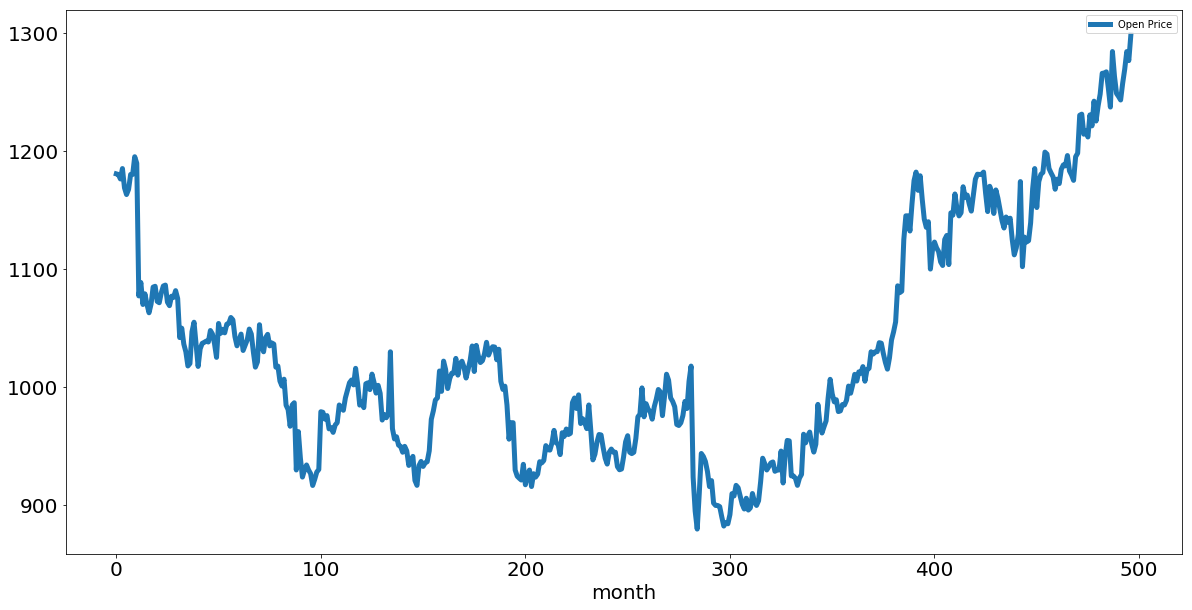

In [4]:
# data_1 = data.iloc[:, [3,4,5,6,7,8,9]]
# print(data_1)
df=data[['Open Price']]
df.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('month',fontsize=20);

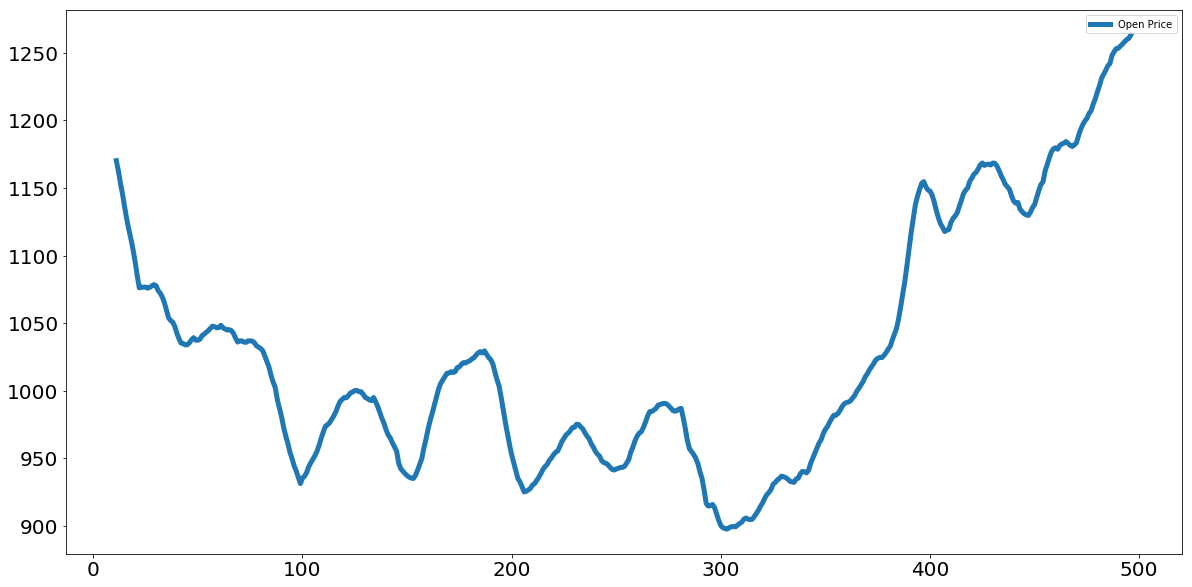

In [5]:
df.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)

,High Price,Low Price,Open Price,Close Price,Prev Close,Average Price,Last Price
High Price,1.000000,0.638090,0.661239,0.637717,0.659941,0.984458,0.638449
Low Price,0.638090,1.000000,0.937837,0.966563,0.917679,0.667484,0.964867
Open Price,0.661239,0.937837,1.000000,0.907295,0.968954,0.671131,0.904173
Close Price,0.637717,0.966563,0.907295,1.000000,0.898553,0.660149,0.997489
Prev Close,0.659941,0.917679,0.968954,0.898553,1.000000,0.669048,0.897967
Average Price,0.984458,0.667484,0.671131,0.660149,0.669048,1.000000,0.660771
Last Price,0.638449,0.964867,0.904173,0.997489,0.897967,0.660771,1.000000


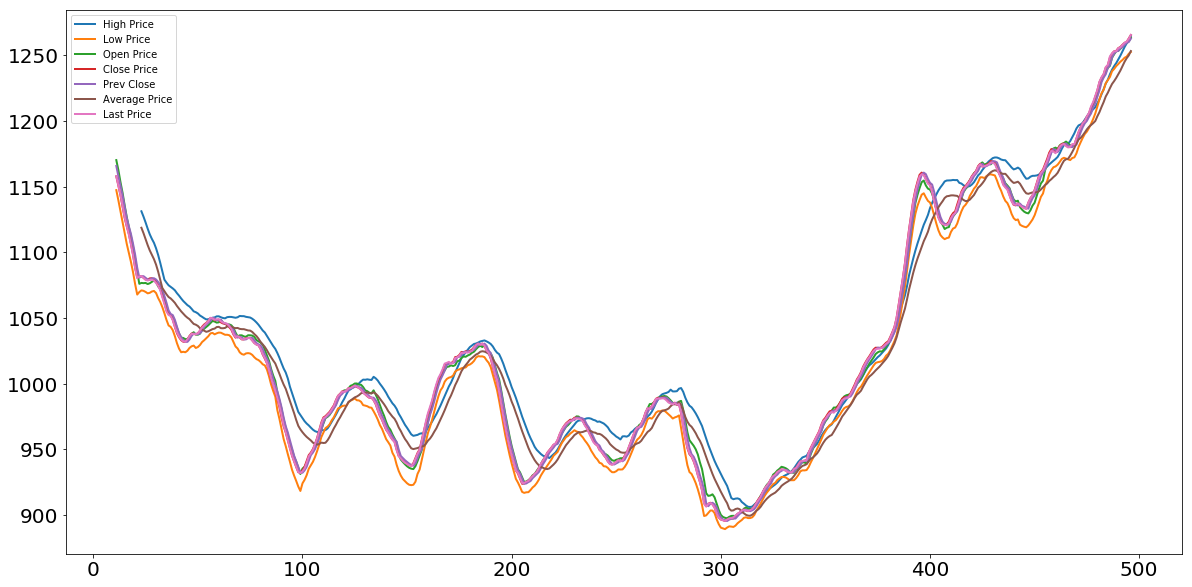

In [6]:
df_rm=pd.concat([data['High Price'].rolling(24).mean(),data['Low Price'].rolling(12).mean(),data['Open Price'].rolling(12).mean(),data['Close Price'].rolling(12).mean(),data['Prev Close'].rolling(12).mean(),data['Average Price'].rolling(24).mean(),data['Last Price'].rolling(12).mean()],axis=1)
df_rm.plot(figsize=(20,10),linewidth=2,fontsize=20)
df_rm.diff().corr()

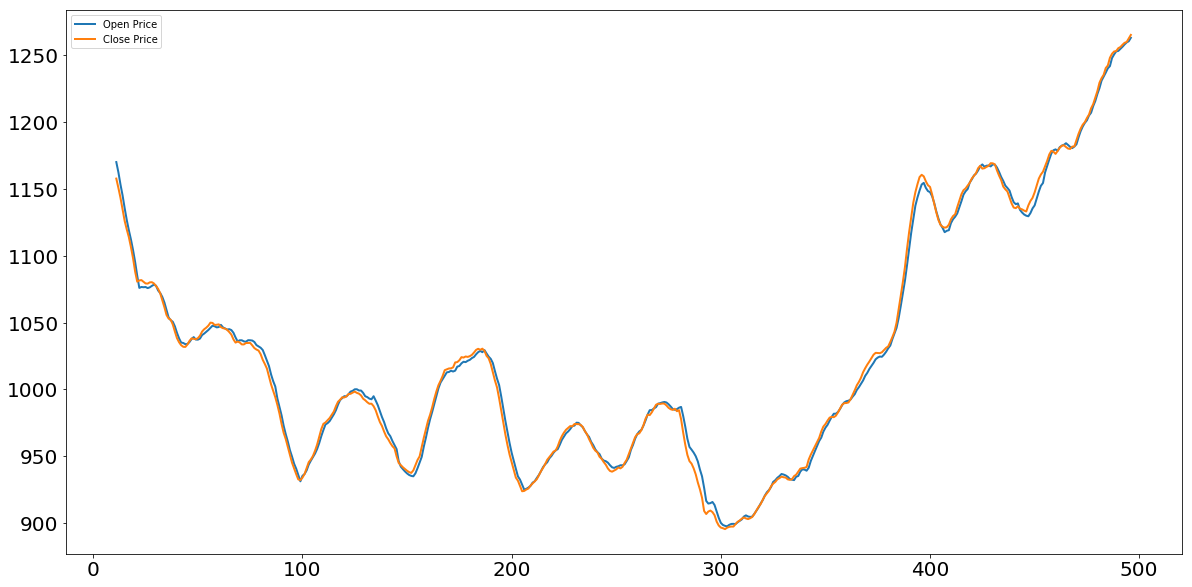

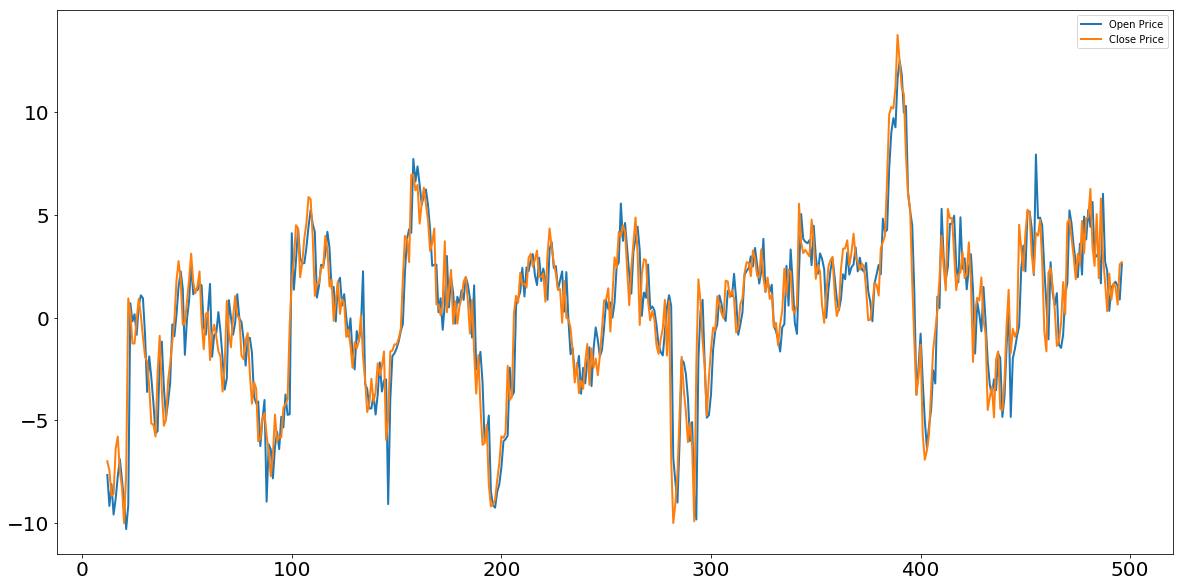

In [7]:
df1=pd.concat([data['Open Price'].rolling(12).mean(),data['Close Price'].rolling(12).mean()],axis=1)
df1.plot(figsize=(20,10),linewidth=2,fontsize=20)
df1.diff().plot(figsize=(20,10),linewidth=2,fontsize=20)

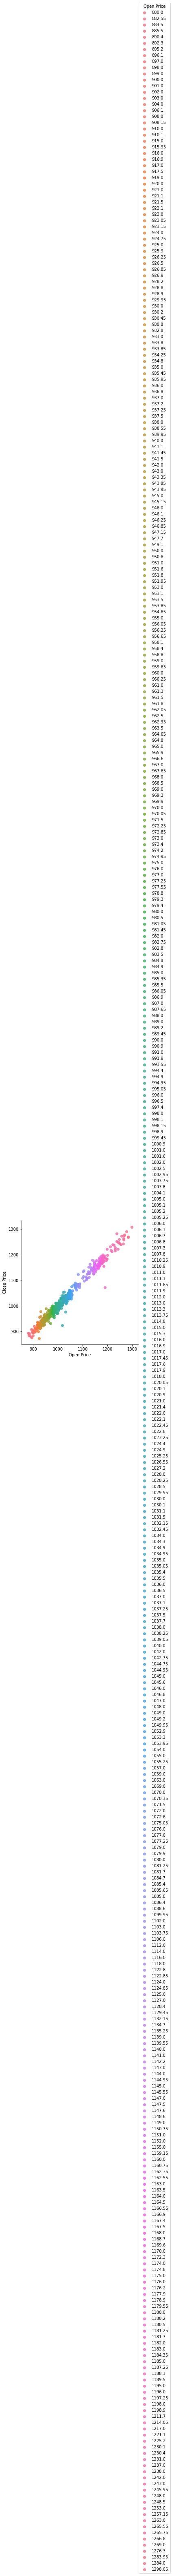

In [8]:
#scatter plot
import seaborn as sns
sns.lmplot(x='Open Price',y='Close Price',fit_reg=False,data=data,hue='Open Price');

In [9]:
data.corr()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Prev Close,1.000000,0.996890,0.992854,0.990689,0.988497,0.988655,0.991527,-0.045020,0.045884,0.035891,-0.055061,-0.094501
Open Price,0.996890,1.000000,0.994397,0.992584,0.989032,0.989396,0.992680,-0.039127,0.051558,0.041871,-0.048781,-0.094188
High Price,0.992854,0.994397,1.000000,0.991365,0.994180,0.994489,0.996486,-0.025545,0.068071,0.053999,-0.036177,-0.120866
Low Price,0.990689,0.992584,0.991365,1.000000,0.996270,0.996524,0.997649,-0.110215,-0.019612,-0.033922,-0.111942,-0.064794
Last Price,0.988497,0.989032,0.994180,0.996270,1.000000,0.999749,0.998619,-0.083484,0.009145,-0.009148,-0.086711,-0.089167
Close Price,0.988655,0.989396,0.994489,0.996524,0.999749,1.000000,0.998976,-0.082556,0.010113,-0.007389,-0.085959,-0.089231
Average Price,0.991527,0.992680,0.996486,0.997649,0.998619,0.998976,1.000000,-0.076637,0.015800,0.000476,-0.081717,-0.091448
Total Traded Quantity,-0.045020,-0.039127,-0.025545,-0.110215,-0.083484,-0.082556,-0.076637,1.000000,0.992738,0.929792,0.971323,-0.202543
Turnover,0.045884,0.051558,0.068071,-0.019612,0.009145,0.010113,0.015800,0.992738,1.000000,0.932356,0.968314,-0.209842
No. of Trades,0.035891,0.041871,0.053999,-0.033922,-0.009148,-0.007389,0.000476,0.929792,0.932356,1.000000,0.882002,-0.242284


In [10]:
# col=['Prev Close','High Price','Low Price','Last Price','Close Price','Average Price']
# x=data_1[col]
# y=data_1['Open Price']
# print(x)

#how many data we will use 
# (should not be more than dataset length )
# data_to_use= 497
 
# number of training data
# should be less than data_to_use
# train_end =397
 
# total_data=len(data)
# print(total_data)
# #most recent data is in the end 
# #so need offset
# start=total_data - data_to_use
# print(start)
# print(data[397:])
#currently doing prediction only for 1 step ahead
# steps_to_predict =1
 
# a = data.iloc [start:total_data ,4]    #open
# b = data.iloc [start:total_data ,5]   #high
# c = data.iloc [start:total_data ,6]   #low
# d = data.iloc [start:total_data ,8]    # close
# e = data.iloc [start:total_data ,9]    #avg
# f = data.iloc [start:total_data ,3]    #prev
# g = data.iloc [start:total_data ,12]     #no.trads


a = data['Prev Close']    
b = data['Open Price']   
c = data['High Price']   
d = data['Low Price']    
e = data['Last Price']    
f = data['Close Price']    
g = data['Average Price']     
h = data['Total Traded Quantity'] 
i = data[ 'Turnover'] 
j = data['No. of Trades'] 
k = data['Deliverable Qty'] 
l = data['% Dly Qt to Traded Qty'] 
m = data['Date'] 
    
# # print ("yt1 head :")
# # print (yt1.head())
# # print(a)
 
# # yt1_ = yt1.shift (-1)
b_ = b.shift (-1)
# print(b_)
# # data_1 = pd.concat ([yt, vt, yt1,yt1_, yt2, yt3], axis =1)
# # data_1. columns = ['yt', 'vt', 'yt1', 'yt1_', 'yt2', 'yt3']

data_1 = pd.concat ([m,a, b, c,d, e, f,g,h,i,j,k,l,b_], axis =1)
data_1. columns = ['m','a','b', 'c', 'd', 'e', 'f','g','h','i','j','k','l','b_']



data_1 = data_1.dropna()
     
# print (data_1 ['b_'])
     
# # # target variable - closed price
# # # after shifting
# y = data_1 ['a_']
# # print(y)
# data_1['HL_PRICE']=(data_1['b']-data_1['c'])/data_1['c']*100 
# data_1['PCT_CNG']=(data_1['d']-data_1['a'])/data_1['a']*100 

# # #       closed,  volume,   open,  high,   low    
# cols =['yt',    'vt',  'yt1', 'yt2', 'yt3']
# cols =['b', 'c', 'd', 'e', 'f','g','HL_PRICE','PCT_CNG']

# data['Open Price_']= data['Open Price'].shift (-1)

# print(a_)
# data_1 = pd.concat ([Prev Close,Open Price, High Price,Low Price, Last Price, Close Price, Average Price,Total Traded Quantity, Turnover,Open Price_])
# data_1. columns = ['Prev Close', 'Open Price','High Price','Low Price', 'Last Price', 'Close Price', 'Average Price','Total Traded Quantity', 'Turnover','Open Price_']









cols=['a','b', 'c', 'd', 'e', 'f','g','i']
x = data_1[cols]
y=data_1['b_']
# print(x)


In [11]:
scaler_x=preprocessing.MinMaxScaler(feature_range=(0,1))
# print(scaler_x)
x=np.array(x).reshape((len(x),len(cols)))
# print(x)
x=scaler_x.fit_transform(x)

scaler_y=preprocessing.MinMaxScaler(feature_range=(0,1))
y=np.array(y).reshape((len(y),1))
y=scaler_y.fit_transform(y)
# print(y)


In [12]:
#spliting dataset into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_test)

[[0.36447223 0.33663366 0.38304094 0.37477477 0.40057327 0.39872657
  0.384093   0.08336406]
 [0.24187814 0.23514851 0.25438596 0.27387387 0.27564792 0.26585776
  0.26158828 0.04547369]
 [0.66164031 0.64356436 0.65119396 0.6627027  0.64433298 0.63623258
  0.64534294 0.06968093]
 [0.18560745 0.16126238 0.16057505 0.203003   0.19252359 0.18837098
  0.17973319 0.03956218]
 [0.6702219  0.66485149 0.68810916 0.69333333 0.70321271 0.69954349
  0.68500169 0.06081305]
 [0.12578154 0.12425743 0.14705166 0.16       0.14057088 0.13647285
  0.142177   0.09332405]
 [0.2136815  0.20123762 0.2044347  0.24036036 0.22775588 0.22308986
  0.21888443 0.02979807]
 [0.29986515 0.27450495 0.26583821 0.27795796 0.2767228  0.26850072
  0.25813234 0.03644846]
 [0.34081157 0.32673267 0.33966862 0.3606006  0.37047653 0.36460836
  0.35750882 0.02455108]
 [0.2862572  0.29430693 0.32261209 0.32036036 0.32580915 0.3254445
  0.32203103 0.0589369 ]
 [0.43104082 0.41881188 0.395346   0.42522523 0.40738087 0.40389236
  0

In [13]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from xgboost import plot_importance
# from matplotlib import pyplot
# from sklearn.metrics import roc_auc_score
# model=XGBClassifier()
# model.fit(X_train,y_train)
# plot_importance(model)
# pyplot.show()
# print("roc_auc_score  *****************************")
# roc_auc_score(y_test, model.predict(X_test))

In [14]:
# Sizes of dataset, train_ds, test_ds
dataset_sz = x.shape[0]
# print(dataset_sz)
train_sz = x_train.shape[0]
test_sz = x_test.shape[0]
# print(test_sz)

In [15]:
# reshape our data into 3 dimensions, [batch_size, timesteps, input_dim]
# x_train = np.reshape(x_train, (x_train.shape[0], -1))
# y_train = np.reshape(y_train, (train_sz, -1))

In [16]:
############ Building the ANN ############
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer and Drop out Regularization
model.add(Dense(units = 250, kernel_initializer = 'uniform' ,activation = 'tanh', input_dim = x.shape[1]))
model.add(Dropout(.2))

# Adding the first hidden layer and Drop out Regularization
model.add(Dense(units = 250, kernel_initializer = 'uniform' ,activation = 'tanh'))
model.add(Dropout(.2))

# Adding the second hidden layer and Drop out Regularization
model.add(Dense(units = 250, kernel_initializer = 'uniform', activation = 'tanh'))
model.add(Dropout(.2))

# Adding the third hidden layer and Drop out Regularization
model.add(Dense(units = 250, kernel_initializer = 'uniform', activation = 'tanh'))
model.add(Dropout(.2))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history=model.fit(x_train, y_train, batch_size = 10, epochs = 100)
print(history)

Epoch 1/100
396/396 [==============================] - 3s 8ms/step - loss: 0.0335
Epoch 2/100
396/396 [==============================] - 0s 910us/step - loss: 0.0017ETA: 0s - loss: 0.00
Epoch 3/100
396/396 [==============================] - 0s 873us/step - loss: 0.0015
Epoch 4/100
396/396 [==============================] - 0s 874us/step - loss: 0.0017
Epoch 5/100
396/396 [==============================] - 0s 900us/step - loss: 0.0014
Epoch 6/100
396/396 [==============================] - 0s 889us/step - loss: 0.0014
Epoch 7/100
396/396 [==============================] - 0s 879us/step - loss: 0.0016
Epoch 8/100
396/396 [==============================] - 0s 962us/step - loss: 0.0015
Epoch 9/100
396/396 [==============================] - 0s 897us/step - loss: 0.0014
Epoch 10/100
396/396 [==============================] - 0s 907us/step - loss: 0.0014
Epoch 11/100
396/396 [==============================] - 0s 903us/step - loss: 0.0013
Epoch 12/100
396/396 [==============================] - 

396/396 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 98/100
396/396 [==============================] - 1s 1ms/step - loss: 0.0020
Epoch 99/100
396/396 [==============================] - 0s 934us/step - loss: 0.0016
Epoch 100/100
396/396 [==============================] - 1s 1ms/step - loss: 0.0018


In [17]:
score_train = model.evaluate (x_train, y_train, batch_size =1)
score_test = model.evaluate (x_test, y_test, batch_size =1)
print (" in train MSE = ", round( score_train ,4)) 
print (" in test MSE = ", score_test )

100/100 [==============================] - 0s 640us/step
 in train MSE =  0.0024
 in test MSE =  0.0026709487477134175


In [18]:
# print(x_test)
pred1 = model.predict (x_test) 
pred1 = scaler_y.inverse_transform (np. array (pred1). reshape ((len( pred1), 1)))

In [19]:
prediction_data = pred1[-1]     

In [20]:
print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(x_test.shape))
print ("Actual output: {}".format(y_test.shape))

Inputs: (None, 8)
Outputs: (None, 1)
Actual input: (100, 8)
Actual output: (100, 1)


In [21]:

print ("prediction data:")
print (prediction_data)

prediction data:
[1180.6737]


In [22]:
# print ("actual data")
x_test = scaler_x.inverse_transform (np. array (x_test). reshape ((len( x_test), len(cols))))
# print (x_test)

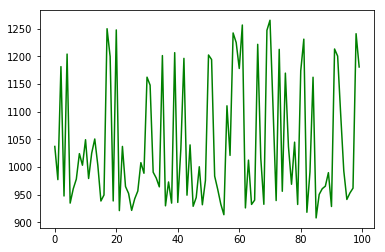

In [23]:
plt.plot(pred1, label="predictions",c='g')
# print(pred1)

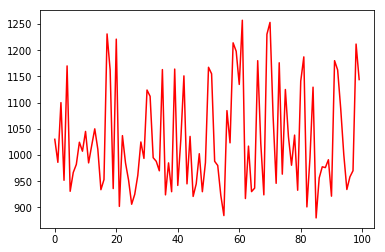

In [24]:
y_test = scaler_y.inverse_transform (np. array (y_test). reshape ((len( y_test), 1)))
plt.plot( [row[0] for row in y_test], label="actual",c='r')

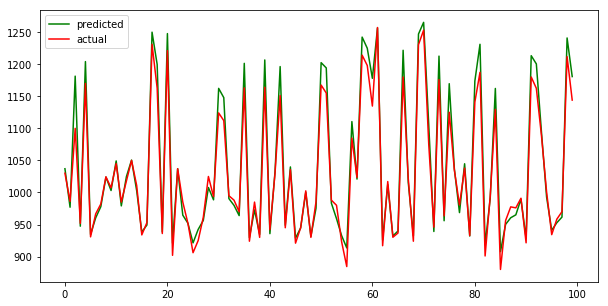

In [25]:
plt.figure(figsize=(10,5))
plt.plot(pred1,label="predicted",c='g')
plt.plot([row[0] for row in y_test],label="actual",c='r')
plt.legend()
plt.show()


In [26]:
# print(x_test[-1])
# print(pred1[-1])

In [27]:
# Save Trained Model
# model.save('PR_data.h5')

In [28]:
# deletes the existing model
# del model

In [29]:
# load Trained Model
# model = load_model('PR_data.h5')

In [30]:
#### PREDICT FUTURE VALUES
# d=x[-1]


In [31]:
# from flask import Flask, abort, jsonify, request, render_template
# from sklearn.externals import joblib
# # import numpy as np
# import json
# # import pickle

# # load the built-in model 
# model = load_model('PR_data.h5')

# app = Flask(__name__)

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/api', methods=['POST'])
# def get_delay():
#     result=request.form
#     a = data['a']
#     b = data['b']
#     c = data['c']
#     d = data['d']
#     f = data['f']
#     g = data['g']
#     h = data['h']
#     yt1 = data['yt1']
    
#     # we create a json object that will hold data from user inputs
#     user_input = {'a':a, 'b':b, 'c':c, 'd':d, 'e':e,'f':f,'g':g,'h':h,'yt1':yt1}
#     # encode the json object to one hot encoding so that it could fit our model
#     A = input_to_one_hot(user_input)
#     # get the price prediction
#     price_pred = model.predict([A])[0]
#     price_pred = round(price_pred, 2)
#     # return a json value
#     return json.dumps({'open_price':price_pred});

# if __name__ == '__main__':
#     app.run(port=8080, debug=True)